In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


In [ ]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('/content/gdrive/MyDrive/benchmark_log_JetsonNano_Cublas.txt')
df2 = pd.read_csv('/content/gdrive/MyDrive/benchmark_log_JetsonNano_Shmem.txt')

labels = ['32','64', '128', '256', '512', '1024', '2048', '4096',]

x = np.arange(len(labels))  # the label locations
width = 1.0  # the width of the bars

df2[' time_CPU(sec)'], df1[' time_CPU(sec)']

(0       0.000901
 1       0.007695
 2       0.069364
 3       0.612519
 4       5.630640
 5      97.153400
 6     811.893000
 7    6676.357000
 Name:  time_CPU(sec), dtype: float64, 0       0.000901
 1       0.007409
 2       0.071588
 3       0.608539
 4       5.814690
 5      96.986100
 6     800.614000
 7    6668.790000
 Name:  time_CPU(sec), dtype: float64)

In [ ]:
df2[' time(msec)']

0       0.052123
1       0.226225
2       0.925713
3       3.371840
4      13.784000
5     102.810000
6     824.540000
7    6579.330000
Name:  time(msec), dtype: float64

In [ ]:
df2.head(10)

,kernel_size,time(msec),ops,GFlop/s,time_CPU(sec)
0,32,0.052123,6.553600e+04,1.25734,0.000901
1,64,0.226225,5.242880e+05,2.31755,0.007695
2,128,0.925713,4.194300e+06,4.53089,0.069364
3,256,3.371840,3.355440e+07,9.95136,0.612519
4,512,13.784000,2.684350e+08,19.47440,5.630640
5,1024,102.810000,2.147480e+09,20.88790,97.153400
6,2048,824.540000,1.717990e+10,20.83570,811.893000
7,4096,6579.330000,1.374390e+11,20.88950,6676.357000


In [ ]:
df1.head(8)

,kernel_size,time(msec),ops,GFlop/s,time_CPU(sec)
0,32,0.076733,6.553600e+04,0.854075,0.000901
1,64,0.184554,5.242880e+05,2.840840,0.007409
2,128,0.353330,4.194300e+06,11.870800,0.071588
3,256,1.314900,3.355440e+07,25.518600,0.608539
4,512,5.449020,2.684350e+08,49.263000,5.814690
5,1024,16.166100,2.147480e+09,132.839000,96.986100
6,2048,115.746000,1.717990e+10,148.427000,800.614000
7,4096,922.886000,1.374390e+11,148.923000,6668.790000


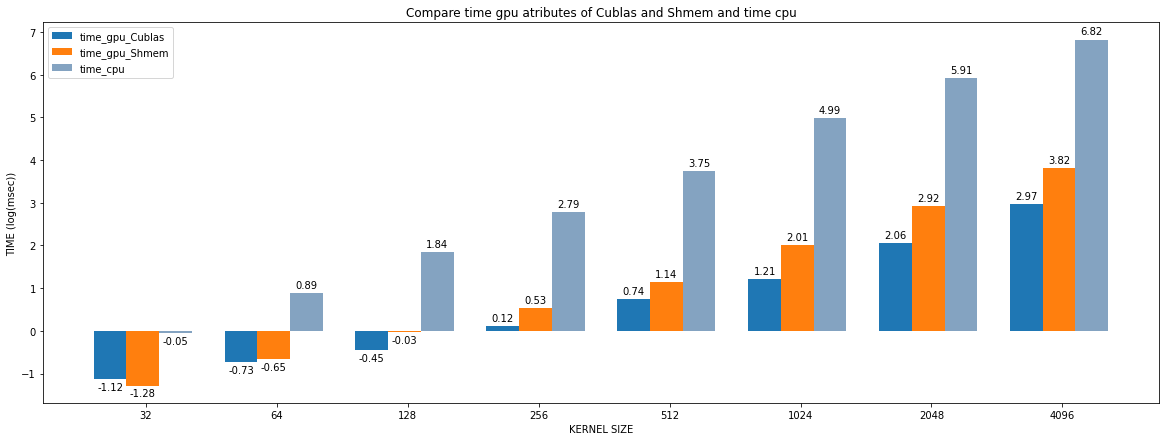

In [ ]:

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig = plt.figure(0, (20, 7))

ax = plt.subplot()
rects1 = ax.bar(x - width/2 - 0.15, round(np.log10(df1[' time(msec)']), 2), width, label='time_gpu_Cublas')
rects2 = ax.bar(x + width/2 - 0.15, round(np.log10(df2[' time(msec)']), 2), width, label='time_gpu_Shmem')
rects3 = ax.bar(x + width + width/2 - 0.15, round(np.log10(df2[' time_CPU(sec)']*1e3), 2), width, label='time_cpu', color=(0.2, 0.4, 0.6, 0.6))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('TIME (log(msec))')
ax.set_xlabel('KERNEL SIZE')
ax.set_title('Compare time gpu atributes of Cublas and Shmem and time cpu')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)


plt.show()


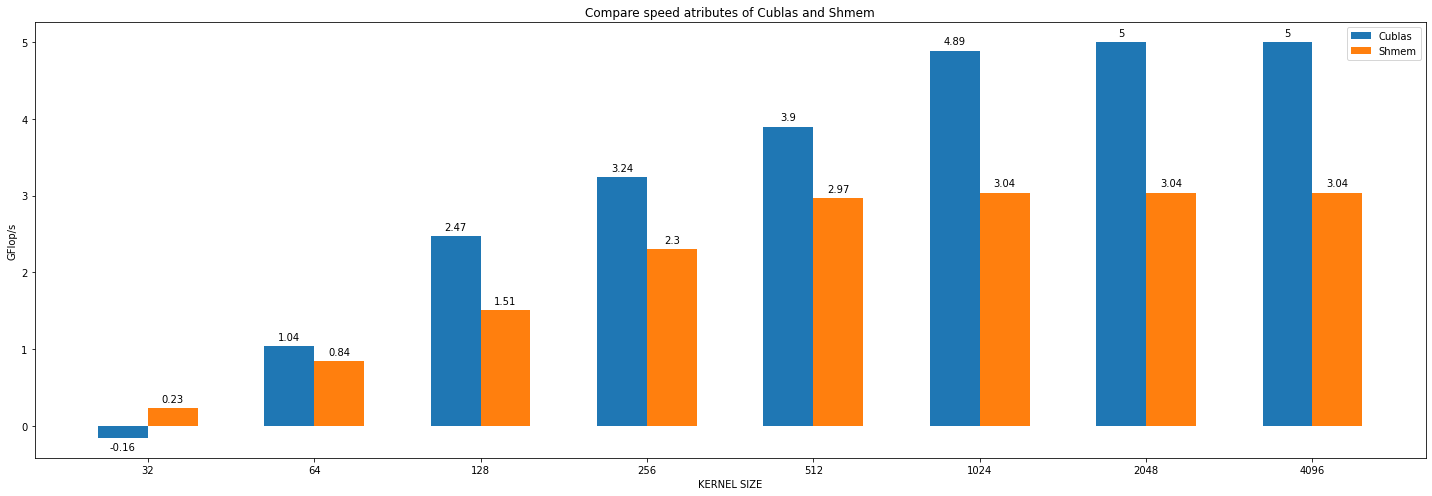

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig = plt.figure(0, (20, 7))

ax = plt.subplot()
rects1 = ax.bar(x - width/2, round(np.log(df1[' GFlop/s']), 2), width, label='Cublas')
rects2 = ax.bar(x + width/2, round(np.log(df2[' GFlop/s']), 2), width, label='Shmem')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GFlop/s')
ax.set_xlabel('KERNEL SIZE')
ax.set_title('Compare speed atributes of Cublas and Shmem')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()

plt.show()


In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig = plt.figure(0, (20, 7))

ax = plt.subplot()
rects1 = ax.bar(x - width/2, round(np.abs(np.log10(df1[' time_CPU(sec)'] * 1e3)), 3), width, label='time_gpu')
rects2 = ax.bar(x + width/2, round(np.abs(np.log10(df1[' time(msec)'])), 3), width, label='time_cpu')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('TIME(sec)')
ax.set_xlabel('KERNEL SIZE')
ax.set_title('Compare time atributes of Cublas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()

plt.show()

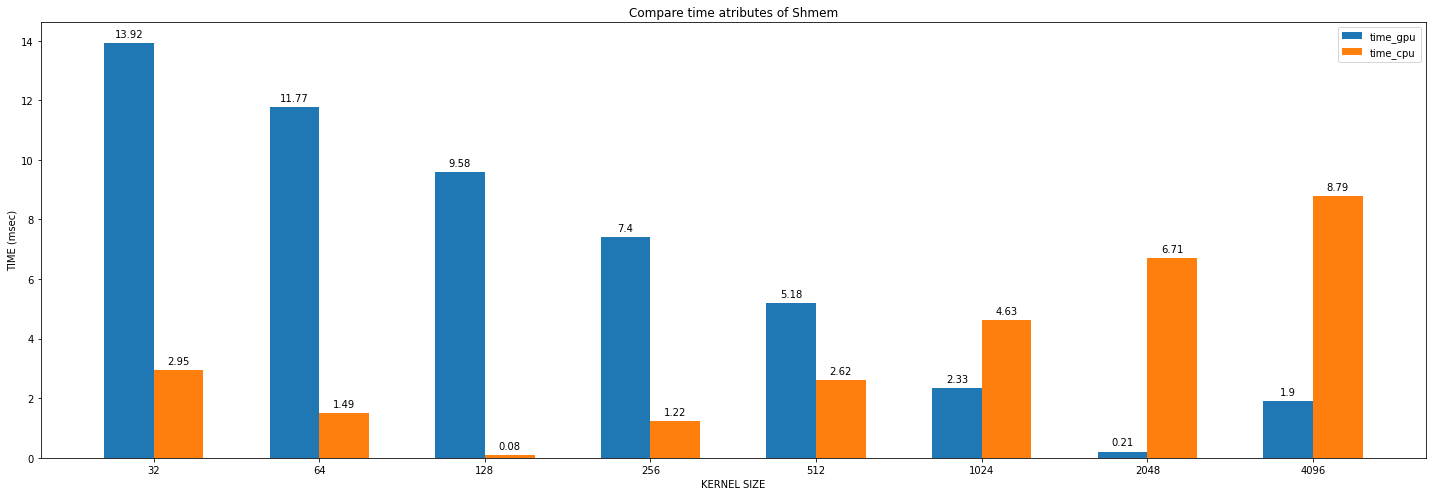

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig = plt.figure(0, (20, 7))

ax = plt.subplot()
rects1 = ax.bar(x - width/2, round(np.abs(np.log(df2[' time_CPU(sec)']/1e3)), 2), width, label='time_gpu')
rects2 = ax.bar(x + width/2, round(np.abs(np.log(df2[' time(msec)'])), 2), width, label='time_cpu')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('TIME (msec)')
ax.set_xlabel('KERNEL SIZE')
ax.set_title('Compare time atributes of Shmem')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()

plt.show()

In [ ]:
GFlop_cpu_df1 = df1[' ops'] / df1[' time_CPU(sec)'] 


In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig = plt.figure(0, (20, 7))

ax = plt.subplot()
rects1 = ax.bar(x - width/2 - 0.15, round(np.log(GFlop_cpu_df1), 2), width, label='GFlop_s_cpu')
rects2 = ax.bar(x + width/2- 0.15, round(np.log(df1[' GFlop/s']), 2), width, label='GFlop_s_gpu_Cublas')
rects3 = ax.bar(x + width/2 + width- 0.15, round(np.log(df2[' GFlop/s']), 2), width, label='GFlop_s_gpu_Shmem')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log(GFlop/s)')
ax.set_xlabel('KERNEL SIZE')
ax.set_title('Compare GFlop/s atributes of Cublas and Shmem and CPU')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

NameError: ignored

In [ ]:
bwe_df1 = (3 * (df1['kernel_size'] ** 2) * 4  ) /  (df1[' time_CPU(sec)'] * 1e9)
bwe_df1_gpu = (3 * (df1['kernel_size'] ** 2) * 4  ) /  (df1[' time(msec)']/1e3 * 1e9)
bwe_df2_gpu = (3 * (df2['kernel_size'] ** 2) * 4  ) /  (df2[' time(msec)']/1e3 * 1e9)


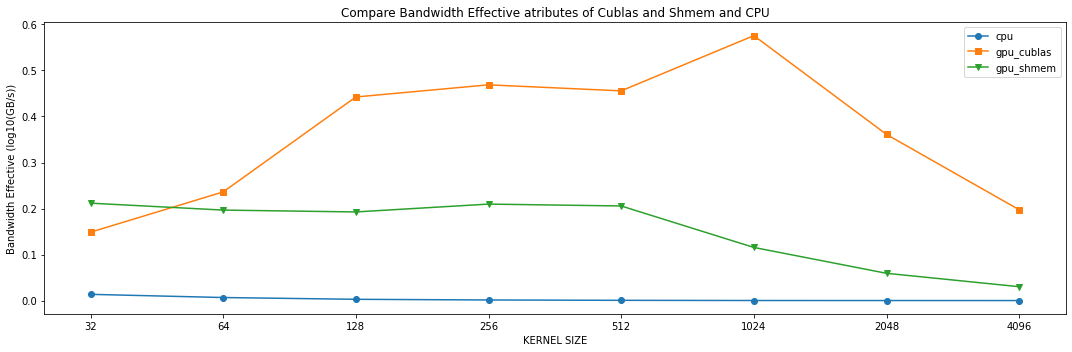

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig = plt.figure(0, (15, 5))

# ax = plt.subplot()
# rects1 = ax.bar(x - width/2 - 0.15, round((np.log1p(bwe_df1)), 4), width, label='cpu')
# rects2 = ax.bar(x + width/2 - 0.15, round((np.log1p(bwe_df1_gpu)), 4), width, label='gpu_cublas')
# rects3 = ax.bar(x + width/2 + width -0.15, round((np.log1p(bwe_df2_gpu)), 4), width, label='gpu_shmem')

plt.plot(labels,(np.log1p(bwe_df1)), linestyle = '-', marker = 'o', label='cpu')
plt.plot(labels,(np.log1p(bwe_df1_gpu)), linestyle = '-', marker = 's', label='gpu_cublas')
plt.plot(labels,(np.log1p(bwe_df2_gpu)), linestyle = '-', marker = 'v', label='gpu_shmem')


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Bandwidth Effective (log10(GB/s))')
plt.xlabel('KERNEL SIZE')
plt.title('Compare Bandwidth Effective atributes of Cublas and Shmem and CPU')
plt.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()